In [1]:
import os
os.environ['PYSPARK_DRIVER_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ['PYSPARK_PYTHON'] = '/opt/anaconda3/bin/python3.7'
os.environ["SPARK_HOME"] = '/opt/cloudera/parcels/CDH/lib/spark'


import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession,SQLContext, Row

In [2]:
user_id = 'anabig114237'

In [3]:
app_name = '{0} : Hive Integration'.format(user_id)
app_name 


spark = SparkSession.builder.appName("app_name").config("spark.sql.catalogImplementation=hive").enableHiveSupport().getOrCreate() #Singleton instance

In [4]:
def get_hdfs_filepath(file_name):
    my_hdfs = '/user/{0}'.format(user_id.lower())
    return os.path.join(my_hdfs,file_name)


sparkSession = (SparkSession.builder.appName("app_name").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate())

In [13]:
sparkSession.sql("use cap1g")

DataFrame[]

In [14]:
sparkSession.sql("show tables").show()

+--------+-------------+-----------+
|database|    tableName|isTemporary|
+--------+-------------+-----------+
|   cap1g|  departments|      false|
|   cap1g|     dept_emp|      false|
|   cap1g|dept_managers|      false|
|   cap1g|    employees|      false|
|   cap1g|     salaries|      false|
|   cap1g|       titles|      false|
+--------+-------------+-----------+



In [16]:
sparkSession.sql("select * from departments").show()

+-------+--------------------+
|dept_no|           dept_name|
+-------+--------------------+
|   d001|         "Marketing"|
|   d002|           "Finance"|
|   d003|   "Human Resources"|
|   d004|        "Production"|
|   d005|       "development"|
|   d006|"Quality Management"|
|   d007|             "Sales"|
|   d008|          "Research"|
|   d009|  "Customer Service"|
+-------+--------------------+



In [22]:
#1.
sparkSession.sql("SELECT emp.emp_no, last_name, first_name, sex, \
salary from employees emp INNER JOIN salaries sal ON emp.emp_no = sal.emp_no").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

In [ ]:
#2.

In [36]:
#3
sparkSession.sql("select a.dept_no, dept_name, b.emp_no, last_name, first_name from departments a \
inner join dept_managers b \
on a.dept_no = b.dept_no \
inner join employees c \
on b.emp_no = c.emp_no ").show()


+-------+--------------------+------+------------+-----------+
|dept_no|           dept_name|emp_no|   last_name| first_name|
+-------+--------------------+------+------------+-----------+
|   d001|         "Marketing"|110022|  Markovitch|  Margareta|
|   d002|           "Finance"|110085|       Alpin|       Ebru|
|   d003|   "Human Resources"|110183|Ossenbruggen|    Shirish|
|   d004|        "Production"|110303|     Wegerle|  Krassimir|
|   d005|       "development"|110511|    Hagimont|   DeForest|
|   d006|"Quality Management"|110725|     Onuegbe|  Peternela|
|   d007|             "Sales"|111035|   Kaelbling|Przemyslawa|
|   d008|          "Research"|111400|     Staelin|       Arie|
|   d009|  "Customer Service"|111692| Butterworth|      Tonny|
+-------+--------------------+------+------------+-----------+



In [57]:
#4
sparkSession.sql("SELECT a.emp_no, last_name, first_name, dept_name \
from employees a \
INNER JOIN dept_emp b \
on a.emp_no = b.emp_no \
INNER JOIN departments c on b.dept_no = c.dept_no " ).show()


+------+-----------+----------+--------------------+
|emp_no|  last_name|first_name|           dept_name|
+------+-----------+----------+--------------------+
| 10001|    Facello|    Georgi|       "development"|
| 10002|     Simmel|   Bezalel|             "Sales"|
| 10003|    Bamford|     Parto|        "Production"|
| 10004|    Koblick| Chirstian|        "Production"|
| 10005|   Maliniak|   Kyoichi|   "Human Resources"|
| 10006|    Preusig|    Anneke|       "development"|
| 10007|  Zielinski|   Tzvetan|          "Research"|
| 10008|   Kalloufi|    Saniya|       "development"|
| 10009|       Peac|    Sumant|"Quality Management"|
| 10010|   Piveteau| Duangkaew|        "Production"|
| 10011|      Sluis|      Mary|  "Customer Service"|
| 10012|  Bridgland|  Patricio|       "development"|
| 10013|     Terkki| Eberhardt|   "Human Resources"|
| 10014|      Genin|     Berni|       "development"|
| 10015|  Nooteboom|  Guoxiang|          "Research"|
| 10016|Cappelletti|  Kazuhito|             "S

In [58]:
#5
sparkSession.sql("	SELECT first_name, last_name, sex \
FROM employees \
WHERE first_name = 'Hercules' and last_name LIKE 'B%'" ).show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



In [107]:
#6
sparkSession.sql('SELECT c.emp_no, last_name, first_name,dept_name \
FROM departments a \
INNER JOIN dept_emp b \
on a.dept_no = b.dept_no \
INNER JOIN employees c \
on b.emp_no = c.emp_no \
WHERE dept_name = "Sales" ').show()

+------+---------+----------+---------+
|emp_no|last_name|first_name|dept_name|
+------+---------+----------+---------+
+------+---------+----------+---------+



In [61]:
#7. 
sparkSession.sql('SELECT a.emp_no, last_name, first_name, dept_name \
from employees a \
INNER JOIN dept_emp b \
on a.emp_no = b.emp_no \
INNER JOIN departments c \
on b.dept_no = c.dept_no \
where c.dept_name =  "Sales" AND c.dept_name = "development"').show()

+------+---------+----------+---------+
|emp_no|last_name|first_name|dept_name|
+------+---------+----------+---------+
+------+---------+----------+---------+



In [63]:
#8.
sparkSession.sql('SELECT last_name, count(*) no_of_employees \
from employees \
GROUP BY last_name \
ORDER BY count(*) DESC').show()

+-----------+---------------+
|  last_name|no_of_employees|
+-----------+---------------+
|       Baba|            226|
|      Coorg|            223|
|     Gelosh|            223|
|     Farris|            222|
|    Sudbeck|            222|
|     Adachi|            221|
|     Osgood|            220|
|     Neiman|            218|
|    Mandell|            218|
|     Masada|            218|
|    Wendorf|            217|
|Boudaillier|            217|
|    Solares|            216|
|   Cummings|            216|
|     Pettis|            216|
|     Mahnke|            216|
|   Collette|            215|
|    Kulisch|            215|
|   Birjandi|            215|
| Maksimenko|            215|
+-----------+---------------+
only showing top 20 rows



In [72]:
#9. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
sal= sparkSession.sql('SELECT salary, count(*) no_of_employees from salaries \
GROUP BY salary')
data1 = sal.toPandas()

In [82]:
data1

,salary,no_of_employees
0,50219,7
1,102092,1
2,91628,2
3,74114,6
4,52051,12
...,...,...
50350,88607,1
50351,94066,1
50352,99539,1
50353,101652,1


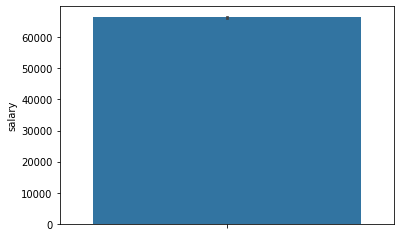

In [94]:
sns.barplot(data=data1, y="salary")

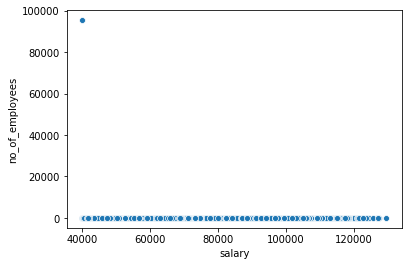

In [98]:
sns.scatterplot(data=data1, x="salary", y="no_of_employees")

In [78]:
#10.
avg_sal = sparkSession.sql("SELECT title, avg(salary) avg_salary \
from titles a \
INNER JOIN employees b \
on a.title_id = b.emp_title_id \
INNER JOIN salaries c \
on b.emp_no =  c.emp_no \
GROUP BY title")
data2 = avg_sal.toPandas()

In [79]:
data2

,title,avg_salary
0,Staff,58465.382850
1,Assistant Engineer,48564.434447
2,Senior Staff,58550.172704
3,Senior Engineer,48506.799871
4,Engineer,48535.336511
5,Manager,51531.041667
6,Technique Leader,48582.896092


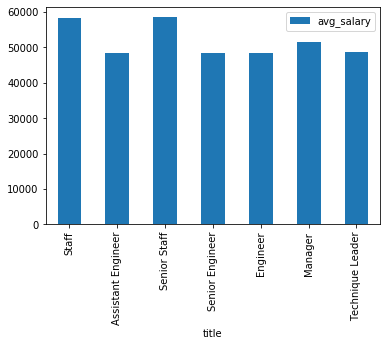

In [83]:
data2.plot(kind = 'bar', x= 'title', y = 'avg_salary')

In [ ]:
#11. 

In [91]:
#12 a
sparkSession.sql('Select left_, count(*) From employees Group by left_').show()

+-----+--------+
|left_|count(1)|
+-----+--------+
| true|  300024|
+-----+--------+



In [96]:
#12 b
sparkSession.sql('select dept_name, count(*) from employees a \
inner join dept_emp b \
on a.emp_no = b.emp_no \
inner join departments c on b.dept_no = c.dept_no \
where left_ \
group by dept_name').show()

+--------------------+--------+
|           dept_name|count(1)|
+--------------------+--------+
|"Quality Management"|   14873|
|        "Production"|   73485|
|       "development"|   81293|
|          "Research"|   14950|
|             "Sales"|   47730|
|           "Finance"|   17346|
|   "Human Resources"|   15166|
|         "Marketing"|   20211|
|  "Customer Service"|   14970|
+--------------------+--------+



In [101]:
#12 c
sparkSession.sql('select sex, count(*) no_of_employees \
from employees \
group by sex').show()

+---+---------------+
|sex|no_of_employees|
+---+---------------+
|  F|         120051|
|  M|         179973|
+---+---------------+



In [102]:
#12 d
sparkSession.sql('select last_performance_rating, count(*) \
from employees \
group by last_performance_rating').show()

+-----------------------+--------+
|last_performance_rating|count(1)|
+-----------------------+--------+
|                      B|  107154|
|                      C|   71304|
|                      A|   95919|
|                      S|   10542|
|                    PIP|   15105|
+-----------------------+--------+



In [104]:
#12 e
sparkSession.sql('select a.emp_no, first_name, last_name, dept_name, last_performance_rating \
from employees a \
inner join dept_managers b \
on a.emp_no = b.emp_no \
inner join departments c \
on b.dept_no = c.dept_no').show()

+------+--------------------+-----------------------+
|emp_no|           dept_name|last_performance_rating|
+------+--------------------+-----------------------+
|110022|         "Marketing"|                      C|
|110085|           "Finance"|                      A|
|110183|   "Human Resources"|                      A|
|110303|        "Production"|                      C|
|110511|       "development"|                      A|
|110725|"Quality Management"|                      A|
|111035|             "Sales"|                      B|
|111400|          "Research"|                      C|
|111692|  "Customer Service"|                      C|
+------+--------------------+-----------------------+

